In [88]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Alfred Hitchcock once said: “The length of a film should be directly related to the endurance of the human bladder.”

In [103]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title = imdb_title_basics_df

q_4_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(1)
q_3_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(.75)
q_2_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(.5)
q_1_Imdb = imdb_title_basics_df["runtime_minutes"].value_counts().quantile(.25)

q_1_Imdb , q_2_Imdb , q_3_Imdb, q_4_Imdb

#Initial attempt to get the range of the occurances using quartile range in the value_counts
#shows broad range, shouldn't look at any below q_3

(1.0, 13.0, 237.5, 7131.0)

In [99]:
most_common = imdb_title["runtime_minutes"].value_counts().index[0]
most_common

90.0

In [104]:
#Show where the longer times are moving more towards
G_90_Imdb = imdb_title.loc[(imdb_title['runtime_minutes'] > 90), ['start_year']].mean()
B_90_Imdb = imdb_title.loc[(imdb_title['runtime_minutes'] < 90), ['start_year']].mean()
Is_90_Imdb = imdb_title.loc[(imdb_title['runtime_minutes'] == 90), ['start_year']].mean()
G_90_Imdb, B_90_Imdb, Is_90_Imdb 
# Shows newer movies are tending to be longer than 90 minutes with showing the average year psuhing to be higher when looking at longer runtimes

(start_year    2014.534216
 dtype: float64,
 start_year    2014.292746
 dtype: float64,
 start_year    2014.450428
 dtype: float64)

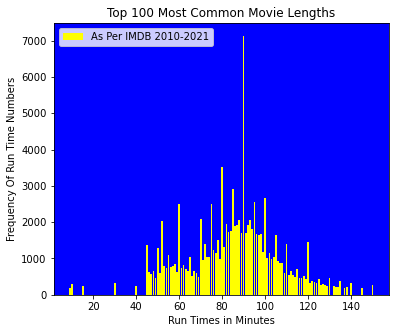

In [105]:
IMDB_Runtime_Numbers = imdb_title['runtime_minutes'].value_counts().nlargest(100)

IMDB_Runtime_Numbers_Index = imdb_title['runtime_minutes'].value_counts().index[0:100]
fig_IMBD, ax =plt.subplots(figsize = (6,5))
ax.bar(IMDB_Runtime_Numbers_Index ,IMDB_Runtime_Numbers , color = 'yellow' )
ax.set_facecolor('blue')
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_title("Top 100 Most Common Movie Lengths")
ax.set_xlabel("Run Times in Minutes")
ax.legend(['As Per IMDB 2010-2021'])

In [ ]:
#Graph that shows frequncy of runtimes
# Pushing towards

In [16]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie = rt_movie_info_df

# new data frame to work on

In [17]:
rt_movie['running_mins']=rt_movie['runtime'].str.split()
rt_movie['running_mins']=rt_movie['running_mins'].str[0]
rt_movie['running_mins'] = rt_movie['running_mins'].astype(float)
# change runtime from a string to a solo float number

In [19]:
# Grabbing just the year from theater date
rt_movie['Year']=rt_movie['theater_date'].str.split()
rt_movie['Year']=rt_movie['Year'].str[2]
rt_movie['Year'] = (rt_movie['Year']).astype(float)


In [20]:
rt_movie.dropna(axis = 0, subset = ['Year'], inplace = True)
rt_movie.dropna(axis = 0, subset = ['running_mins'], inplace = True)
# Removing any null values in the columns 'Year' and 'running_mins'

In [22]:
# Seeing if the standard feature time of 90 is more towards current movies 
rt_movie.loc[(rt_movie['running_mins'] ==90), ['Year']].mean()
# Average year being 1987 can possibly show

Year    1986.807692
dtype: float64

In [23]:
#checking normal runtimes for newer movies
print(rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']].mean())
print(rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']].max())
print(rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']].min())
# rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']]
#Ave 16 mins longer than mode of data set
# Max length 148 min
# Min legnth 80
#Showing More Modern Movies are longer than the feature length Standard
# Modern movies being greater in this case being 2015 and present 

running_mins    106.461538
dtype: float64
running_mins    148.0
dtype: float64
running_mins    80.0
dtype: float64


In [25]:
#function to do what was above, just grabbing the float number from the string
def string_to_float(df, series):
    df[series] = df[series].str.split()
    df[series] = df[series].str[0]
    df[series] = df[series].astype(float)
    return df[series]
    

In [27]:
q_4_rt = rt_movie["running_mins"].value_counts().quantile(1)
q_3_rt = rt_movie["running_mins"].value_counts().quantile(.75)
q_2_rt = rt_movie["running_mins"].value_counts().quantile(.5)
q_1_rt = rt_movie["running_mins"].value_counts().quantile(.25)
q_1_rt , q_2_rt, q_3_rt, q_4_rt
# shows broad range and may want to ignore anything below q_3

(1.25, 3.0, 18.0, 53.0)

In [107]:
Top_100_RT_Indexes = rt_movie['running_mins'].value_counts().index[:80]
Top_100_RT = rt_movie['running_mins'].value_counts().nlargest(80)
#grabbbing 100 most common runtimes from rotten tomatoes file 

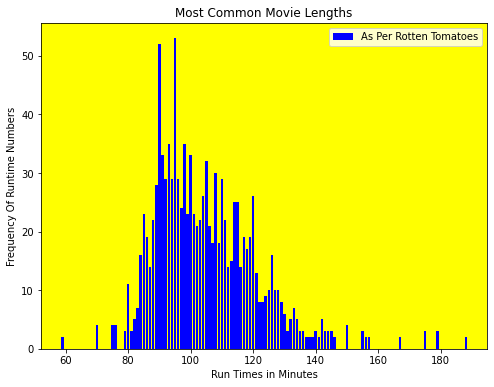

In [108]:
fig_rt , ax = plt.subplots(figsize = (8,6))
ax.bar(Top_100_RT_Indexes , Top_100_RT, color = 'blue' )
ax.set_ylabel("Frequency Of Runtime Numbers")
ax.set_xlabel("Run Times in Minutes")
ax.set_title('Most Common Movie Lengths')
ax.set_facecolor('yellow')
ax.legend(['As Per Rotten Tomatoes'])
# plot showing top 100 most common runtimes
#hist later

In [58]:
a = rt_movie.loc[(rt_movie['Year'] <=2000), ['Year']]
b = rt_movie.loc[(rt_movie['Year'] >2000), ['Year']]
print(a.value_counts().sum())  
print(b.value_counts().sum())

720
474


In [ ]:
#hue color for box office strength

In [115]:
# Gathering Values within Rotten Tomatoes File Where only looking at frequncy runtime within the past 10 years
P10_Years_RT = rt_movie.loc[(rt_movie['Year'] >=2011),['running_mins']].value_counts().nlargest(50)
ten = P10_Years_RT.index[0:50]
# way to turn multi-index into float values for the x column
P10_Index = ten.get_level_values(0).astype(float)
print(P10_Index)

# ten.index = [a]

Float64Index([100.0, 104.0,  90.0,  92.0, 118.0,  95.0, 105.0, 107.0,  89.0,
               97.0, 120.0,  93.0, 111.0, 108.0,  98.0, 102.0, 109.0,  99.0,
              103.0,  91.0, 129.0, 119.0,  94.0, 116.0, 142.0,  84.0, 127.0,
              126.0,  86.0,  81.0,  85.0, 112.0,  87.0,  96.0,  88.0, 115.0,
              132.0, 122.0, 110.0,  83.0,  80.0,  77.0, 188.0, 101.0, 133.0,
              157.0, 148.0, 147.0, 145.0, 141.0],
             dtype='float64', name='running_mins')


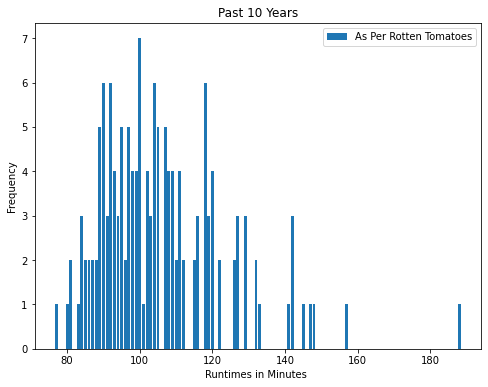

In [119]:
# Graph shoiwing most frequent runtimes of the past 10 years rotten tomatoes graph
fig_Rotten_Modern , ax= plt.subplots(figsize = (8,6))
ax.bar(P10_Index, P10_Years_RT)
ax.set_xlabel('Runtimes in Minutes ')
ax.set_ylabel('Frequency')
ax.set_title('Past 10 Years')
ax.legend(['As Per Rotten Tomatoes'])

In [109]:
# top most 5 or 10 common of each decade put in a list or dictionary key, year ,value most common runtime put in line chart?
mode_1 = rt_movie.loc[rt_movie['Year'] < 1941, ['running_mins']].mode()
mode_2 = rt_movie.loc[(rt_movie['Year'] >= 1941) & (rt_movie['Year'] <1961), ['running_mins']].mode()
mode_3 = rt_movie.loc[(rt_movie['Year'] >= 1961) & (rt_movie['Year'] <1981), ['running_mins']].mode()
mode_4 = rt_movie.loc[(rt_movie['Year'] >= 1981) & (rt_movie['Year'] <2001), ['running_mins']].mode()
mode_5 = rt_movie.loc[(rt_movie['Year'] >= 2001) & (rt_movie['Year'] <2011), ['running_mins']].mode()
mode_6 = rt_movie.loc[(rt_movie['Year'] >= 2011) , ['running_mins']].mode()

In [120]:
mode_values = [mode_1, mode_2, mode_3, mode_4, mode_5, mode_6]
modes = ['1921', '1941', '1961', '1981', '2001', '2011' ]
#Line graph to shower no-technical viewer that trend for movie lengths is getting longer

In [ ]:
# Final graph withlengths of movies based off curennt movies and subset graph of all movies
#modern movies are longer and have been performing well?